In [1]:
import pandas as pd
import numpy as np

from pandas_datareader import data
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier

#### Importing unfiltered data

In [2]:
vader_all= pd.read_csv('../Data/2_Processed/Unstructured_Data/All/all_vader.csv')
vader_all = vader_all.replace(np.nan,0)
vader_all.head(5).append(vader_all.tail(5))

Date      AAPL      META      TSLA     World  Politics  \
0     2018-01-03  0.306400 -0.058857  0.000000 -0.046392       0.0   
1     2018-01-04  0.000000  0.000000  0.000000 -0.086625       0.0   
2     2018-01-05  0.134133  0.068750 -0.061333 -0.143635       0.0   
3     2018-01-06  0.100667  0.044083  0.314000 -0.070018       0.0   
4     2018-01-07  0.000000  0.000000  0.143000 -0.108743       0.0   
1736  2022-12-06  0.000000 -0.227500  0.000000 -0.105793       0.0   
1737  2022-12-07 -0.192000  0.310000 -0.021923  0.019353       0.0   
1738  2022-12-08  0.082333 -0.074500  0.196571 -0.108931       0.0   
1739  2022-12-09  0.277857  0.068250  0.123857 -0.069472       0.0   
1740  2022-12-10  0.000000  0.141600  0.000000  0.000000       0.0   

      Coronavirus  
0        0.000000  
1        0.000000  
2        0.000000  
3        0.000000  
4        0.000000  
1736     0.000000  
1737     0.081667  
1738    -0.074000  
1739     0.000000  
1740     0.000000

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

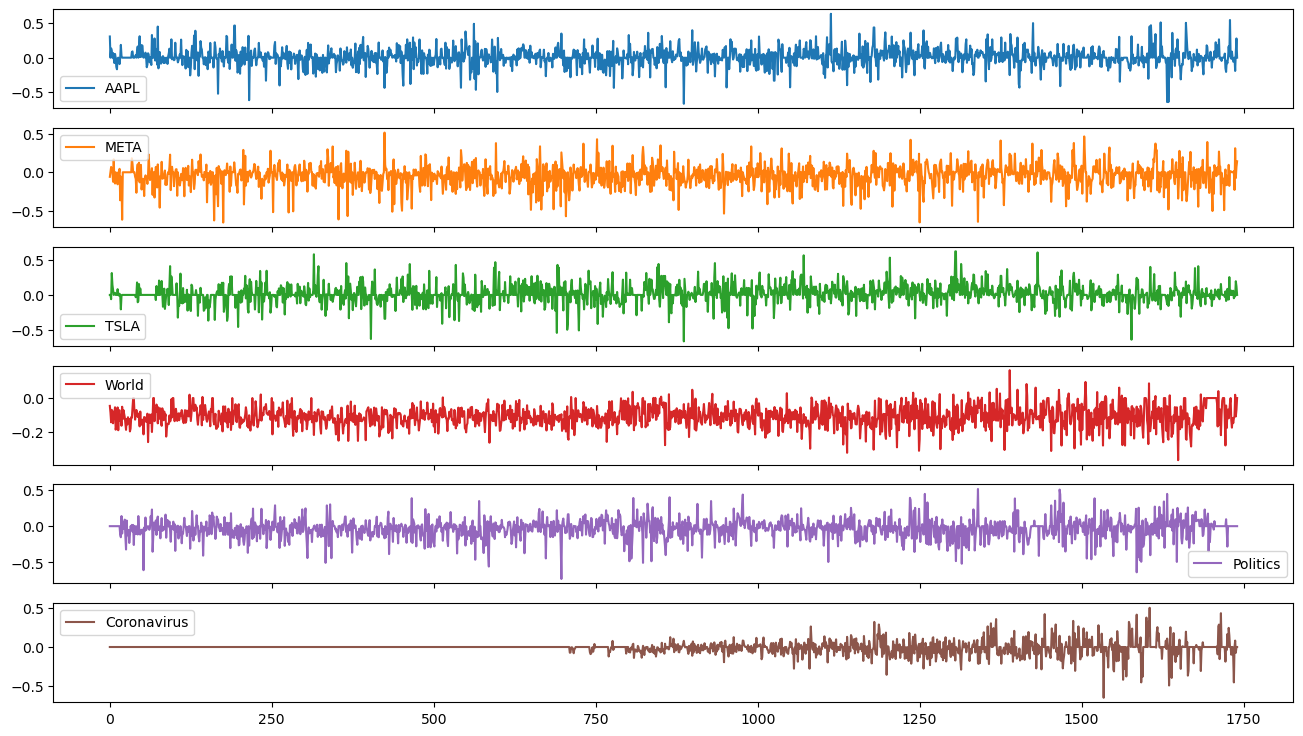

In [3]:
vader_all.plot(figsize=(16,9),subplots=True)

In [7]:
flair_all= pd.read_csv('../Data/2_Processed/Unstructured_Data/All/all_flair.csv')
flair_all = flair_all.replace(np.nan,0)
flair_all.head(5).append(flair_all.tail(5))

Date      AAPL      META      TSLA     World  Politics  \
0     2018-01-03  0.600000 -0.571429  0.000000 -0.544304       0.0   
1     2018-01-04  0.000000 -1.000000  0.000000 -0.583333       0.0   
2     2018-01-05  0.066667 -0.500000  0.333333 -0.730769       0.0   
3     2018-01-06  0.000000 -0.333333  1.000000 -0.636364       0.0   
4     2018-01-07  0.000000  0.000000  1.000000 -0.600000       0.0   
1736  2022-12-06  0.000000  0.000000  0.000000 -0.172414       0.0   
1737  2022-12-07 -1.000000  1.000000 -0.692308 -0.411765       0.0   
1738  2022-12-08  0.000000  0.000000  0.428571 -0.793103       0.0   
1739  2022-12-09  0.142857 -0.500000 -0.142857 -0.396226       0.0   
1740  2022-12-10  0.000000  0.600000  0.000000  0.000000       0.0   

      Coronavirus  
0        0.000000  
1        0.000000  
2        0.000000  
3        0.000000  
4        0.000000  
1736    -1.000000  
1737    -0.333333  
1738     0.000000  
1739     0.000000  
1740     0.000000

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

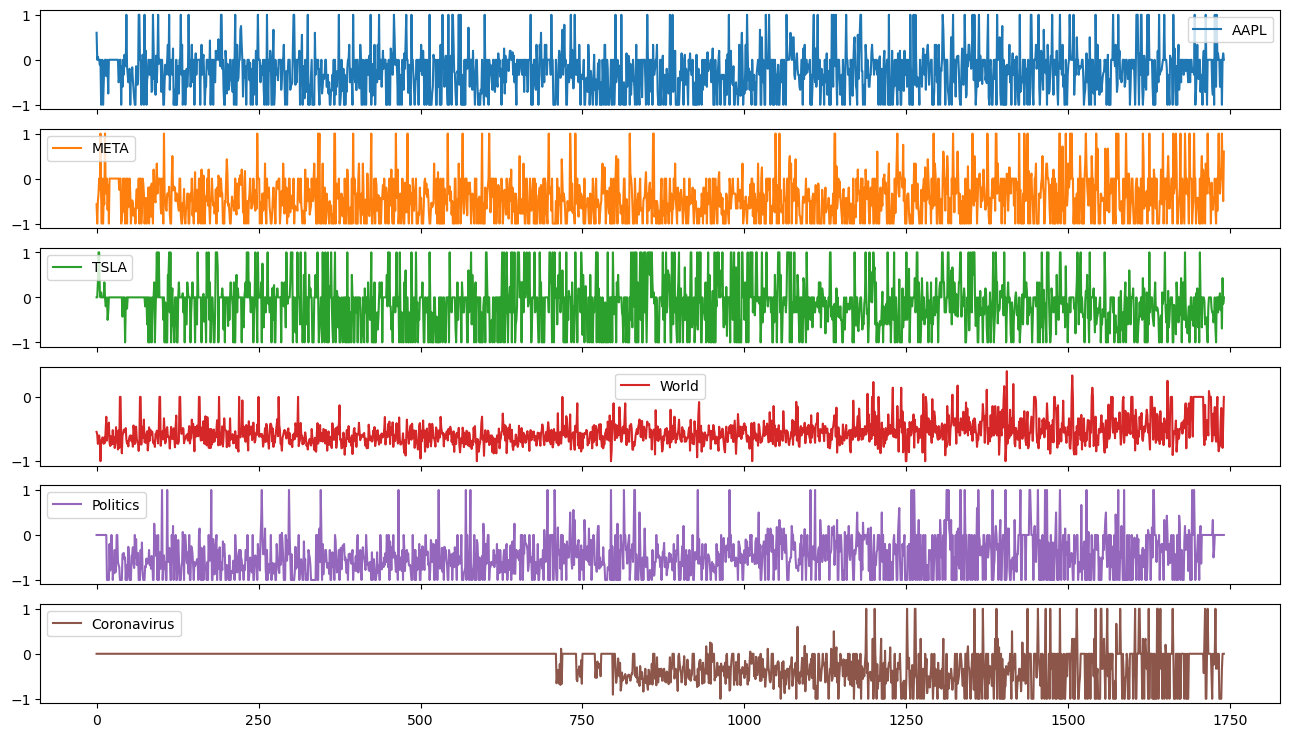

In [8]:
flair_all.plot(figsize=(16,9),subplots=True)

In [6]:
finbert_all= pd.read_csv('../Data/2_Processed/Unstructured_Data/All/all_finbert.csv')
finbert_all = finbert_all.replace(np.nan,0)
finbert_all.head(5).append(finbert_all.tail(5))

Date      AAPL      META      TSLA     World  Politics  \
0     2018-01-03 -0.102317 -0.328605  0.000000 -0.187394       0.0   
1     2018-01-04  0.000000 -0.279706  0.000000 -0.237588       0.0   
2     2018-01-05  0.189436 -0.092877  0.084386 -0.297506       0.0   
3     2018-01-06  0.160202 -0.088187  0.220575 -0.206285       0.0   
4     2018-01-07  0.000000  0.000000 -0.042963 -0.392491       0.0   
1736  2022-12-06  0.000000 -0.288284  0.000000 -0.132247       0.0   
1737  2022-12-07 -0.208962  0.340929 -0.290627 -0.102536       0.0   
1738  2022-12-08  0.063883 -0.400615  0.024500 -0.200342       0.0   
1739  2022-12-09  0.606935 -0.154664  0.032192 -0.137133       0.0   
1740  2022-12-10  0.000000  0.024467  0.000000  0.000000       0.0   

      Coronavirus  
0        0.000000  
1        0.000000  
2        0.000000  
3        0.000000  
4        0.000000  
1736    -0.315690  
1737     0.429384  
1738    -0.053323  
1739     0.000000  
1740     0.000000

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

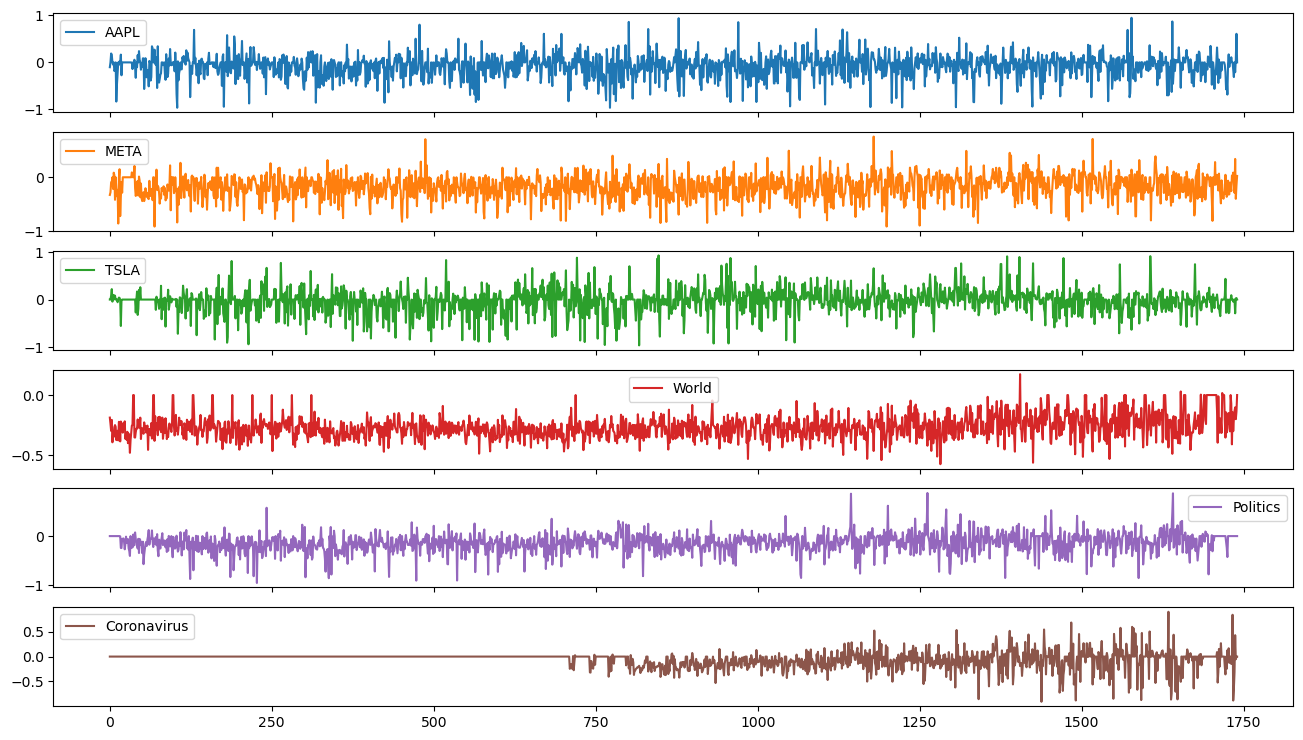

In [9]:
finbert_all.plot(figsize=(16,9),subplots=True)

#### Refactor dataframe for random forest classifier to predict upwards or downwards trend

In [10]:
vader_class = vader_all.copy()

vader_class.loc[vader_class['AAPL'] > 0, 'AAPL'] = 1
vader_class.loc[vader_class['AAPL'] < 0, 'AAPL'] = -1
vader_class.loc[vader_class['META'] > 0, 'META'] = 1
vader_class.loc[vader_class['META'] < 0, 'META'] = -1
vader_class.loc[vader_class['TSLA'] > 0, 'TSLA'] = 1
vader_class.loc[vader_class['TSLA'] < 0, 'TSLA'] = -1
vader_class.loc[vader_class['World'] > 0, 'World'] = 1
vader_class.loc[vader_class['World'] < 0, 'World'] = -1
vader_class.loc[vader_class['Politics'] > 0, 'Politics'] = 1
vader_class.loc[vader_class['Politics'] < 0, 'Politics'] = -1
vader_class.loc[vader_class['Coronavirus'] > 0, 'Coronavirus'] = 1
vader_class.loc[vader_class['Coronavirus'] < 0, 'Coronavirus'] = -1
vader_class.iloc[:,1:] = vader_class.iloc[:,1:].astype(int)
vader_class

Date  AAPL  META  TSLA  World  Politics  Coronavirus
0     2018-01-03     1    -1     0     -1         0            0
1     2018-01-04     0     0     0     -1         0            0
2     2018-01-05     1     1    -1     -1         0            0
3     2018-01-06     1     1     1     -1         0            0
4     2018-01-07     0     0     1     -1         0            0
...          ...   ...   ...   ...    ...       ...          ...
1736  2022-12-06     0    -1     0     -1         0            0
1737  2022-12-07    -1     1    -1      1         0            1
1738  2022-12-08     1    -1     1     -1         0           -1
1739  2022-12-09     1     1     1     -1         0            0
1740  2022-12-10     0     1     0      0         0            0

[1741 rows x 7 columns]

In [11]:
flair_class = flair_all.copy()

flair_class.loc[flair_class['AAPL'] > 0, 'AAPL'] = 1
flair_class.loc[flair_class['AAPL'] < 0, 'AAPL'] = -1
flair_class.loc[flair_class['META'] > 0, 'META'] = 1
flair_class.loc[flair_class['META'] < 0, 'META'] = -1
flair_class.loc[flair_class['TSLA'] > 0, 'TSLA'] = 1
flair_class.loc[flair_class['TSLA'] < 0, 'TSLA'] = -1
flair_class.loc[flair_class['World'] > 0, 'World'] = 1
flair_class.loc[flair_class['World'] < 0, 'World'] = -1
flair_class.loc[flair_class['Politics'] > 0, 'Politics'] = 1
flair_class.loc[flair_class['Politics'] < 0, 'Politics'] = -1
flair_class.loc[flair_class['Coronavirus'] > 0, 'Coronavirus'] = 1
flair_class.loc[flair_class['Coronavirus'] < 0, 'Coronavirus'] = -1
flair_class.iloc[:,1:] = flair_class.iloc[:,1:].astype(int)
flair_class

Date  AAPL  META  TSLA  World  Politics  Coronavirus
0     2018-01-03     1    -1     0     -1         0            0
1     2018-01-04     0    -1     0     -1         0            0
2     2018-01-05     1    -1     1     -1         0            0
3     2018-01-06     0    -1     1     -1         0            0
4     2018-01-07     0     0     1     -1         0            0
...          ...   ...   ...   ...    ...       ...          ...
1736  2022-12-06     0     0     0     -1         0           -1
1737  2022-12-07    -1     1    -1     -1         0           -1
1738  2022-12-08     0     0     1     -1         0            0
1739  2022-12-09     1    -1    -1     -1         0            0
1740  2022-12-10     0     1     0      0         0            0

[1741 rows x 7 columns]

In [12]:
finbert_class = finbert_all.copy()

finbert_class.loc[finbert_class['AAPL'] > 0, 'AAPL'] = 1
finbert_class.loc[finbert_class['AAPL'] < 0, 'AAPL'] = -1
finbert_class.loc[finbert_class['META'] > 0, 'META'] = 1
finbert_class.loc[finbert_class['META'] < 0, 'META'] = -1
finbert_class.loc[finbert_class['TSLA'] > 0, 'TSLA'] = 1
finbert_class.loc[finbert_class['TSLA'] < 0, 'TSLA'] = -1
finbert_class.loc[finbert_class['World'] > 0, 'World'] = 1
finbert_class.loc[finbert_class['World'] < 0, 'World'] = -1
finbert_class.loc[finbert_class['Politics'] > 0, 'Politics'] = 1
finbert_class.loc[finbert_class['Politics'] < 0, 'Politics'] = -1
finbert_class.loc[finbert_class['Coronavirus'] > 0, 'Coronavirus'] = 1
finbert_class.loc[finbert_class['Coronavirus'] < 0, 'Coronavirus'] = -1
finbert_class.iloc[:,1:] = finbert_class.iloc[:,1:].astype(int)
finbert_class

Date  AAPL  META  TSLA  World  Politics  Coronavirus
0     2018-01-03    -1    -1     0     -1         0            0
1     2018-01-04     0    -1     0     -1         0            0
2     2018-01-05     1    -1     1     -1         0            0
3     2018-01-06     1    -1     1     -1         0            0
4     2018-01-07     0     0    -1     -1         0            0
...          ...   ...   ...   ...    ...       ...          ...
1736  2022-12-06     0    -1     0     -1         0           -1
1737  2022-12-07    -1     1    -1     -1         0            1
1738  2022-12-08     1    -1     1     -1         0           -1
1739  2022-12-09     1    -1     1     -1         0            0
1740  2022-12-10     0     1     0      0         0            0

[1741 rows x 7 columns]

#### Calculating stock price and returns

In [13]:
# Define the instruments to download. We would like to see Apple, Meta and the Tesla index.
tickers = ['AAPL', 'META', 'TSLA']

# We would like all available data from 01/31/2018 until 08/31/2016 but we retrieve till 09/01 to calculate returns on 08/31
start_date = '2018-01-31'
end_date = '2022-09-01' 

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
panel_data = data.DataReader(tickers, 'yahoo', start_date, end_date)

In [14]:
stock_df = pd.DataFrame(panel_data)
print(stock_df.head())
print(stock_df.shape)

Attributes  Adj Close                             Close              \
Symbols          AAPL        META       TSLA       AAPL        META   
Date                                                                  
2018-01-30  39.692940  187.119995  23.054667  41.742500  187.119995   
2018-01-31  39.802284  186.889999  23.620667  41.857498  186.889999   
2018-02-01  39.885483  193.089996  23.283333  41.945000  193.089996   
2018-02-02  38.154854  190.279999  22.916668  40.125000  190.279999   
2018-02-05  37.201569  181.259995  22.208668  39.122501  181.259995   

Attributes                  High                               Low  \
Symbols          TSLA       AAPL        META       TSLA       AAPL   
Date                                                                 
2018-01-30  23.054667  41.842499  188.179993  23.218000  41.174999   
2018-01-31  23.620667  42.110001  189.830002  23.746000  41.625000   
2018-02-01  23.283333  42.154999  195.320007  23.977333  41.689999   
2018-02-02 

In [15]:
# function to obtain returns from closing prices 
def getReturns(closingPrices):
      return closingPrices.diff()[1:].div(closingPrices[:-1])

#### Reindexing dates to ensure same number of rows by having it on weekdays (trading days)

In [16]:
weekdays = pd.bdate_range(start=start_date, end='2022-08-31' )

vader_all['Date'] = pd.to_datetime(vader_all['Date'])
vader_all_w = vader_all[vader_all['Date'].isin(weekdays)]
vader_all_w = vader_all_w.fillna(method='ffill')
print('vader regress shape ', vader_all_w.shape)

flair_all['Date'] = pd.to_datetime(flair_all['Date'])
flair_all_w = flair_all[flair_all['Date'].isin(weekdays)]
flair_all_w = flair_all_w.fillna(method='ffill')
print('flair regress shape ', flair_all_w.shape)

finbert_all['Date'] = pd.to_datetime(finbert_all['Date'])
finbert_all_w = finbert_all[finbert_all['Date'].isin(weekdays)]
finbert_all_w = finbert_all_w.fillna(method='ffill')
print('flair regress shape ', finbert_all_w.shape)

vader_class['Date'] = pd.to_datetime(vader_class['Date'])
vader_class_w = vader_class[vader_class['Date'].isin(weekdays)]
vader_class_w = vader_class_w.fillna(method='ffill')
print('vader class shape ', vader_class_w.shape)

flair_class['Date'] = pd.to_datetime(flair_class['Date'])
flair_class_w = flair_class[flair_class['Date'].isin(weekdays)]
flair_class_w = flair_class_w.fillna(method='ffill')
print('flair class shape ', flair_class_w.shape)

finbert_class['Date'] = pd.to_datetime(finbert_class['Date'])
finbert_class_w = finbert_class[finbert_class['Date'].isin(weekdays)]
finbert_class_w = finbert_class_w.fillna(method='ffill')
print('finbert class shape ', finbert_class_w.shape)

vader regress shape  (1193, 7)
flair regress shape  (1193, 7)
flair regress shape  (1193, 7)
vader class shape  (1193, 7)
flair class shape  (1193, 7)
finbert class shape  (1193, 7)


In [17]:
# creating closing price and returns data frame 
close = panel_data['Close']
returns = getReturns(close)

# lag the data by 1 day to prevent data leakage
returns = returns.shift(-1)
close = close.shift(-1)

close = close.reindex(weekdays)
close = close.fillna(method='ffill')
returns = returns.reindex(weekdays)
returns = returns.fillna(method='ffill')

# remove top 3 rows so it starts at same date as sentiment analysis
returns = returns.iloc[3:]
print('returns ', returns.shape)
close = close.iloc[3:]
print('close ', close.shape)

returns  (1193, 3)
close  (1193, 3)


In [18]:
returns

Symbols         AAPL      META      TSLA
2018-02-05  0.040115  0.021855  0.002515
2018-02-06 -0.021875 -0.028472  0.031971
2018-02-07 -0.028295 -0.050122 -0.094439
2018-02-08  0.008056  0.025723 -0.015495
2018-02-09  0.038719  0.001701  0.016818
...              ...       ...       ...
2022-08-25 -0.039176 -0.043269 -0.027700
2022-08-26 -0.013880 -0.016398 -0.011481
2022-08-29 -0.015543 -0.012789 -0.025639
2022-08-30 -0.010749  0.035414 -0.007583
2022-08-31 -0.010749  0.035414 -0.007583

[1193 rows x 3 columns]

In [19]:
close

Symbols           AAPL        META        TSLA
2018-02-05   40.757500  185.309998   22.264668
2018-02-06   39.884998  180.179993   23.000000
2018-02-07   38.787498  171.580002   21.015333
2018-02-08   39.102501  176.110001   20.694668
2018-02-09   40.677502  176.410004   21.048668
...                ...         ...         ...
2022-08-25  163.619995  161.779999  288.089996
2022-08-26  161.380005  159.169998  284.820007
2022-08-29  158.910004  157.160004  277.700012
2022-08-30  157.220001  162.929993  275.609985
2022-08-31  157.960007  165.360001  277.160004

[1193 rows x 3 columns]

In [20]:
up_down = close.copy()
for i in range(1,len(up_down)) :
    up_down.iloc[i][0] = 1 if close.iloc[i-1][0] < close.iloc[i][0] else -1 
    up_down.iloc[i][1] = 1 if close.iloc[i-1][1] < close.iloc[i][1] else -1
    up_down.iloc[i][2] = 1 if close.iloc[i-1][2] < close.iloc[i][2]  else -1
up_down = up_down.iloc[1:]
up_down

Symbols     AAPL  META  TSLA
2018-02-06  -1.0  -1.0   1.0
2018-02-07  -1.0  -1.0  -1.0
2018-02-08   1.0   1.0  -1.0
2018-02-09   1.0   1.0   1.0
2018-02-12   1.0  -1.0   1.0
...          ...   ...   ...
2022-08-25  -1.0  -1.0  -1.0
2022-08-26  -1.0  -1.0  -1.0
2022-08-29  -1.0  -1.0  -1.0
2022-08-30  -1.0   1.0  -1.0
2022-08-31   1.0   1.0   1.0

[1192 rows x 3 columns]

##### Creating stacked dataframe

In [21]:
# rename columns
vader_rename = {'AAPL': 'AAPL_v', 'META': 'META_v', 'TSLA': 'TSLA_v', 'World': 'Word_v', 'Coronavirus': 'Coronavirus_v', 'Politics': 'Politics_v'}
flair_rename = {'AAPL': 'AAPL_fl', 'META': 'META_fl', 'TSLA': 'TSLA_fl', 'World': 'Word_fl', 'Coronavirus': 'Coronavirus_fl', 'Politics': 'Politics_fl'}
finbert_rename = {'AAPL': 'AAPL_fb', 'META': 'META_fb', 'TSLA': 'TSLA_fb', 'World': 'Word_fb', 'Coronavirus': 'Coronavirus_fb', 'Politics': 'Politics_fb'}
vader_all_s = vader_all_w.rename(columns= vader_rename)
flair_all_s = flair_all_w.rename(columns= flair_rename)
finbert_all_s = finbert_all_w.rename(columns= finbert_rename)

# combine dataframes on date
vader_flair = pd.merge(vader_all_s, flair_all_s, on='Date')
df_stacked = pd.merge(vader_flair, finbert_all_s, on='Date')
df_stacked

Date    AAPL_v    META_v    TSLA_v    Word_v  Politics_v  \
0    2018-02-05 -0.008200 -0.155214  0.082222 -0.055508    0.000000   
1    2018-02-06  0.000000  0.000000  0.000000 -0.190514    0.000000   
2    2018-02-07 -0.028250 -0.029375 -0.009000 -0.079000    0.000000   
3    2018-02-08 -0.093045  0.044333  0.017000 -0.071927    0.000000   
4    2018-02-09  0.000000 -0.361500  0.000000 -0.135400   -0.117400   
...         ...       ...       ...       ...       ...         ...   
1188 2022-08-25  0.054500  0.064000  0.058375 -0.119429   -0.238000   
1189 2022-08-26 -0.035500 -0.220000  0.040857 -0.056463    0.152333   
1190 2022-08-29 -0.048500 -0.132667  0.017917 -0.050900    0.068667   
1191 2022-08-30  0.117000  0.040333 -0.013667 -0.164816    0.083125   
1192 2022-08-31 -0.112375 -0.120000 -0.057750 -0.179093    0.079714   

      Coronavirus_v   AAPL_fl   META_fl   TSLA_fl   Word_fl  Politics_fl  \
0            0.0000 -0.066667 -0.571429  0.333333 -0.630769     0.000000   
1            0.0000  0.000000  1.000000  0.000000 -0.714286     0.000000   
2            0.0000  0.000000 -0.250000 -0.200000 -0.526316     0.000000   
3            0.0000 -0.363636 -0.333333 -0.166667 -0.309091     0.000000   
4            0.0000  0.000000  0.000000  0.000000 -0.680000    -1.000000   
...             ...       ...       ...       ...       ...          ...   
1188        -0.2080  0.000000  1.000000 -0.250000 -0.500000    -1.000000   
1189         0.0000 -0.500000 -1.000000  0.428571 -0.463415    -0.777778   
1190         0.0265  0.000000 -0.333333  0.333333 -0.500000    -1.000000   
1191         0.0000 -0.333333 -0.666667 -0.333333 -0.368421    -1.000000   
1192         0.0000 -0.250000 -1.000000 -0.500000 -0.488372    -0.142857   

      Coronavirus_fl   AAPL_fb   META_fb   TSLA_fb   Word_fb  Politics_fb  \
0                0.0 -0.225908 -0.234459 -0.056553 -0.296783     0.000000   
1                0.0  0.000000 -0.860367  0.000000 -0.376477     0.000000   
2                0.0 -0.051114 -0.013030  0.041989 -0.222407     0.000000   
3                0.0  0.022816  0.149406  0.034420 -0.243440     0.000000   
4                0.0  0.000000 -0.721908  0.000000 -0.384913    -0.005908   
...              ...       ...       ...       ...       ...          ...   
1188            -1.0 -0.510447 -0.311848 -0.130035 -0.242095    -0.218530   
1189             0.0 -0.252230 -0.710338  0.151133 -0.200845    -0.050471   
1190             0.0 -0.158586  0.051604 -0.082961 -0.216253    -0.049834   
1191             0.0  0.162533  0.134610 -0.531380 -0.256550    -0.287863   
1192            -1.0 -0.202677 -0.400004  0.063461 -0.216130    -0.499324   

      Coronavirus_fb  
0           0.000000  
1           0.000000  
2           0.000000  
3           0.000000  
4           0.000000  
...              ...  
1188       -0.639052  
1189        0.000000  
1190       -0.071528  
1191        0.000000  
1192       -0.431681  

[1193 rows x 19 columns]

#### Visualisations

##### Visualisation of closing price

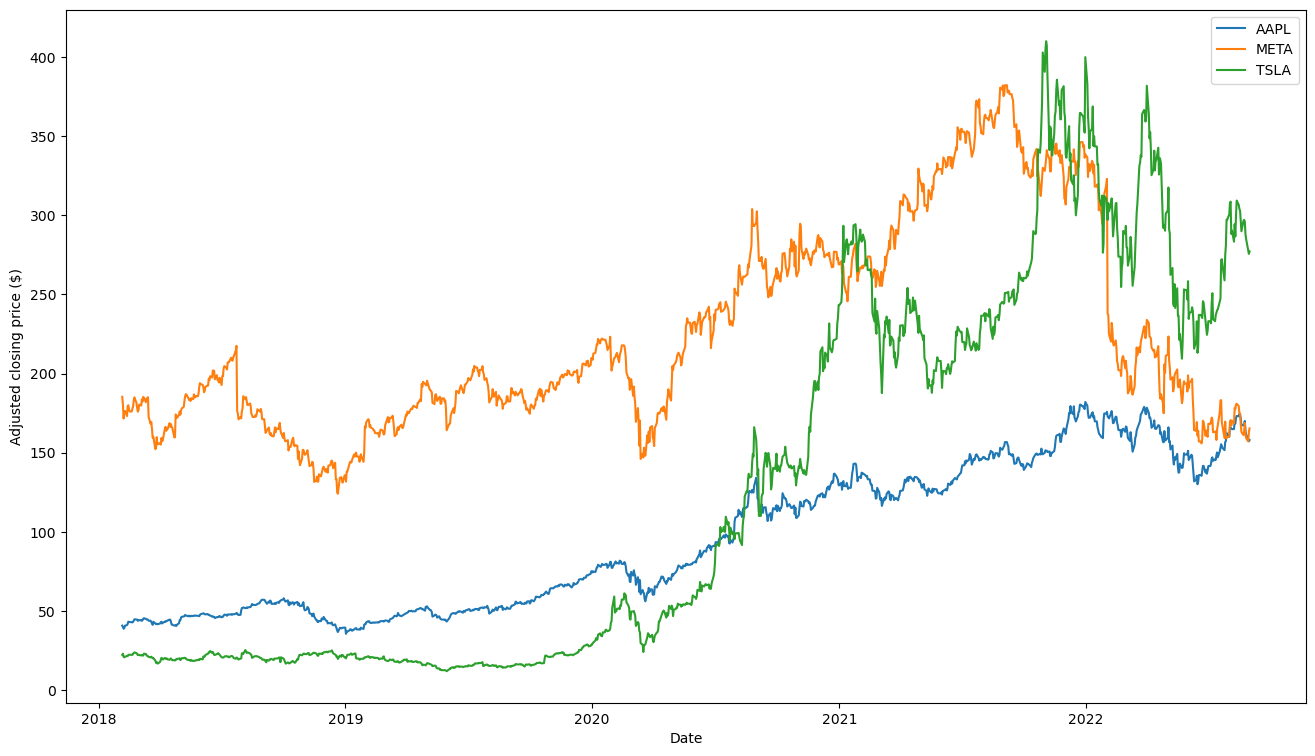

In [60]:
# Get timeseries. This now returns a Pandas Series object indexed by date.
aapl = close.loc[:, 'AAPL']
meta = close.loc[:, 'META']
tsla = close.loc[:, 'TSLA']

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(aapl.index, aapl, label='AAPL')
ax.plot(meta.index, meta, label='META')
ax.plot(tsla.index, tsla, label='TSLA')

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()

##### Visualisation of stock returns

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

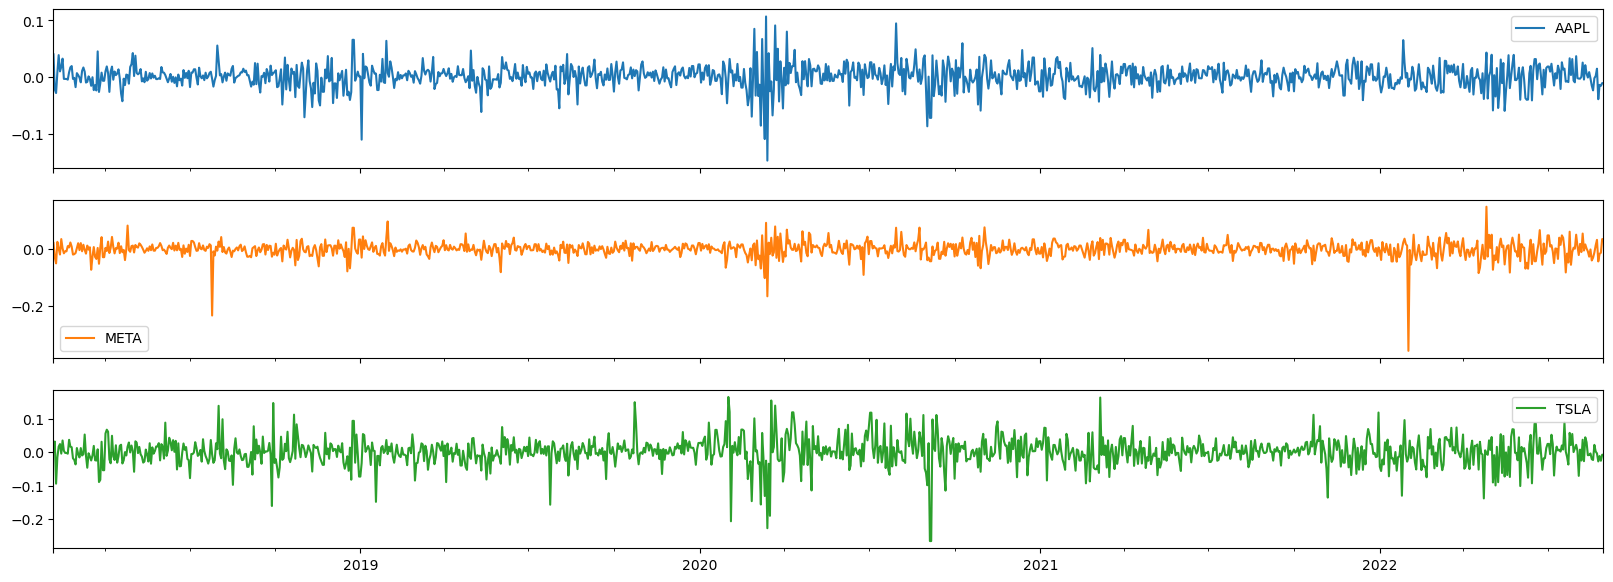

In [61]:
returns.plot(figsize=(20,7),subplots=True)

#### Model building

In [22]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 2000, num = 20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [10, 114, 219, 324, 428, 533, 638, 743, 847, 952, 1057, 1162, 1266, 1371, 1476, 1581, 1685, 1790, 1895, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [23]:
# rf regressor for returns

def rf_r_returns(t_model,csv_name,tuning = False) : 

    df_train = pd.DataFrame(t_model.iloc[1:1014,0],columns=['Date'])
    df_test = pd.DataFrame(t_model.iloc[1014:,0],columns=['Date']) 
    
    df_result = pd.DataFrame()
    df_result['Company'] = ['AAPL', 'META', 'TSLA']
    train_results = []
    test_results = []
    models = []

    for i in range(3) : 
        X_train, X_test, y_train, y_test = train_test_split(t_model.iloc[1:,1:],returns.iloc[1:,i],test_size=0.15)

        scalar = StandardScaler()
        X_train_s = scalar.fit_transform(X_train)
        X_test_s = scalar.transform(X_test)

        model = RandomForestRegressor(n_estimators=100,random_state=42)
        if tuning:
            rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
            rf_random.fit(X_train_s,y_train)
            model = rf_random.best_estimator_
        model.fit(X_train_s,y_train)
        models.append(model)
        train_pred = model.predict(X_train_s)
        test_pred = model.predict(X_test_s)

        df_train[tickers[i]] = train_pred
        df_test[tickers[i]] = test_pred 

        train_results.append(model.score(X_train_s,y_train))
        test_results.append(model.score(X_test_s,y_test))
        print("train R-squared score : {}".format(model.score(X_train_s,y_train)))
        print("test R-squared score : {}".format(model.score(X_test_s,y_test)))

        xtrain = t_model.iloc[1:1014,0]
        ytrain = train_pred
        xtest = t_model.iloc[1014:,0]
        ytest = test_pred 
        xstock = t_model.iloc[1:,0]
        ystock = returns.iloc[1:,1]

        plt.plot(xstock,ystock,'lightgray',xtrain,ytrain,'blue',xtest,ytest,'orange')
        plt.legend([tickers[i],"Train","Test"])
        plt.show()  
    
    print('--- Saving predictions into csv ---')
    df_train.to_csv('../Data/3_Predictions/Unstructured_Data/rf_regressor/returns/{}_rfr_train.csv'.format(csv_name),index=False)
    df_test.to_csv('../Data/3_Predictions/Unstructured_Data/rf_regressor/returns/{}_rfr_test.csv'.format(csv_name),index=False) 
    print('--- Predictions saved ---') 
    
    df_result['Train score'] = train_results
    df_result['Test score'] = test_results
    if tuning:
        df_result['Model'] = 'Tuned regressor for returns'
    else: 
        df_result['Model'] = 'Regressor for returns'
    return df_result, models

In [24]:
# rf regressor for closing price

def rf_r_close(t_model,csv_name) : 

    df_train = pd.DataFrame(t_model.iloc[1:1014,0],columns=['Date'])
    df_test = pd.DataFrame(t_model.iloc[1014:,0],columns=['Date'])

    df_result = pd.DataFrame()
    df_result['Company'] = ['AAPL', 'META', 'TSLA']
    train_results = []
    test_results = [] 

    for i in range(3) : 
        X_train, X_test, y_train, y_test = train_test_split(t_model.iloc[1:,1:],close.iloc[1:,i],test_size=0.15)

        scalar = StandardScaler()
        X_train_s = scalar.fit_transform(X_train)
        X_test_s = scalar.transform(X_test)

        model = RandomForestRegressor(n_estimators=100,random_state=42)
        model.fit(X_train_s,y_train)
        train_pred = model.predict(X_train_s)
        test_pred = model.predict(X_test_s)

        df_train[tickers[i]] = train_pred
        df_test[tickers[i]] = test_pred 

        train_results.append(model.score(X_train_s,y_train))
        test_results.append(model.score(X_test_s,y_test))
        print("train R-squared score : {}".format(model.score(X_train_s,y_train)))
        print("test R-squared score : {}".format(model.score(X_test_s,y_test)))

        xtrain = t_model.iloc[1:1014,0]
        ytrain = train_pred
        xtest = t_model.iloc[1014:,0]
        ytest = test_pred 
        xstock = t_model.iloc[1:,0]
        ystock = close.iloc[1:,1]

        plt.plot(xstock,ystock,'lightgray',xtrain,ytrain,'blue',xtest,ytest,'orange')
        plt.legend([tickers[i],"Train","Test"])
        plt.show()  
    
    print('--- Saving predictions into csv ---')
    df_train.to_csv('../Data/3_Predictions/Unstructured_Data/rf_regressor/close/{}_rfr_train.csv'.format(csv_name),index=False)
    df_test.to_csv('../Data/3_Predictions/Unstructured_Data/rf_regressor/close/{}_rfr_test.csv'.format(csv_name),index=False) 
    print('--- Predictions saved ---')
    
    df_result['Train score'] = train_results
    df_result['Test score'] = test_results
    df_result['Model'] = 'Regressor for price'
    return df_result

In [25]:
# rf classifier for closing price

def rf_c_close(t_model,csv_name) : 

    df_train = pd.DataFrame(t_model.iloc[1:1014,0],columns=['Date'])
    df_test = pd.DataFrame(t_model.iloc[1014:,0],columns=['Date'])

    df_result = pd.DataFrame()
    df_result['Company'] = ['AAPL', 'META', 'TSLA']
    train_results = []
    test_results = [] 

    for i in range(3) : 
        X_train, X_test, y_train, y_test = train_test_split(t_model.iloc[1:,1:],up_down.iloc[:,i],test_size=0.15)

        model = RandomForestClassifier(n_estimators=100,random_state=42)
        model.fit(X_train,y_train)
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)

        df_train[tickers[i]] = train_pred
        df_test[tickers[i]] = test_pred 

        matrix_train = plot_confusion_matrix(model,X_train,y_train,cmap=plt.cm.Blues,normalize='true')
        matrix_test = plot_confusion_matrix(model,X_test,y_test,cmap=plt.cm.Blues,normalize='true')

        print(matrix_train)
        print(matrix_test)

        train_results.append(model.score(X_train,y_train))
        test_results.append(model.score(X_test,y_test))
        print("train R-squared score : {}".format(model.score(X_train,y_train)))
        print("test R-squared score : {}".format(model.score(X_test,y_test)))

    print('--- Saving predictions into csv ---')
    df_train.to_csv('../Data/3_Predictions/Unstructured_Data/rf_classifier/close/{}_updown_train.csv'.format(csv_name),index=False)
    df_test.to_csv('../Data/3_Predictions/Unstructured_Data/rf_classifier/close/{}_updown_test.csv'.format(csv_name),index=False) 
    print('--- Predictions saved ---')

    df_result['Train score'] = train_results
    df_result['Test score'] = test_results
    df_result['Model'] = 'Classifier for price'
    return df_result


#### Predicting returns

##### Vader

train R-squared score : 0.8415154484893486
test R-squared score : -0.12939475629178276


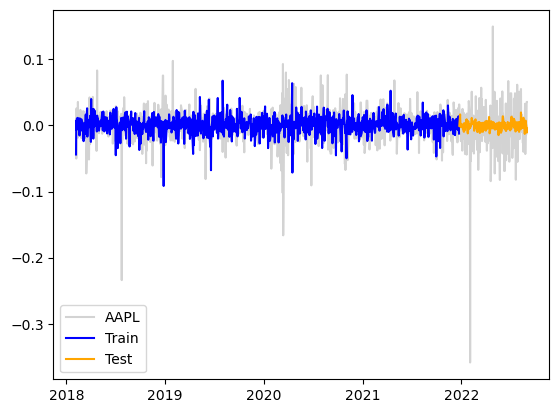

train R-squared score : 0.8566627854578323
test R-squared score : -0.158078549408607


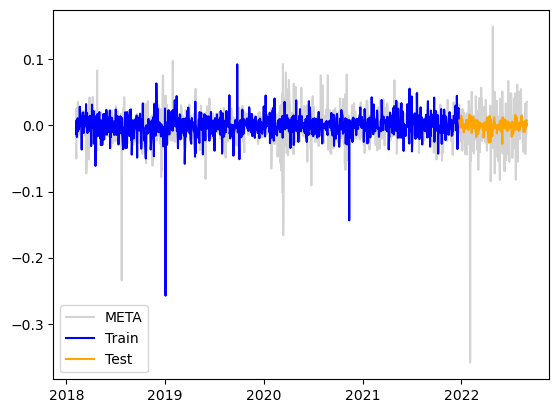

train R-squared score : 0.8441738435667192
test R-squared score : -0.09471053771559745


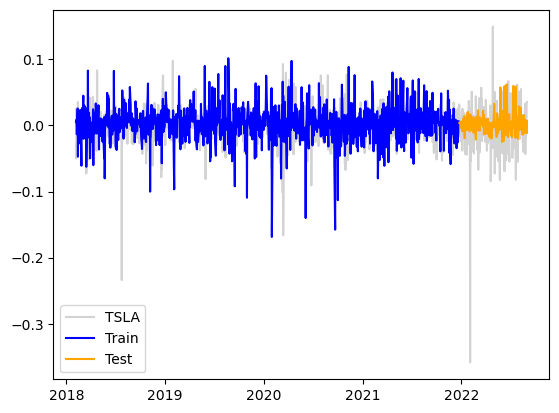

--- Saving predictions into csv ---
--- Predictions saved ---


In [26]:
# vader
vader_rr_results, vader_models = rf_r_returns(vader_all_w,'vader_pred_returns')


Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=219; total time=   0.6s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=219; total time=   0.6s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=219; total time=   0.6s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=533; total time=   1.6s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=533; total time=   1.7s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=533; total time=   1.8s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10

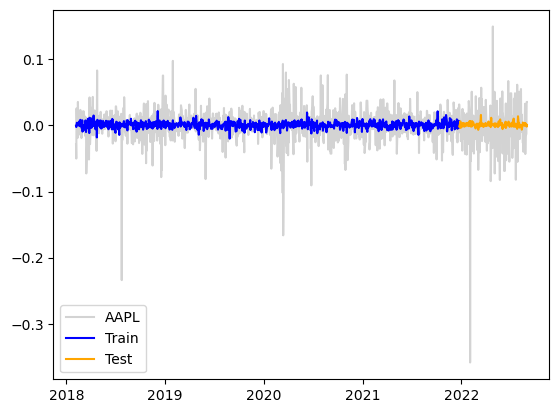

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=219; total time=   0.6s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=219; total time=   0.6s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=219; total time=   0.5s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=533; total time=   1.4s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=533; total time=   1.4s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=533; total time=   1.5s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=4

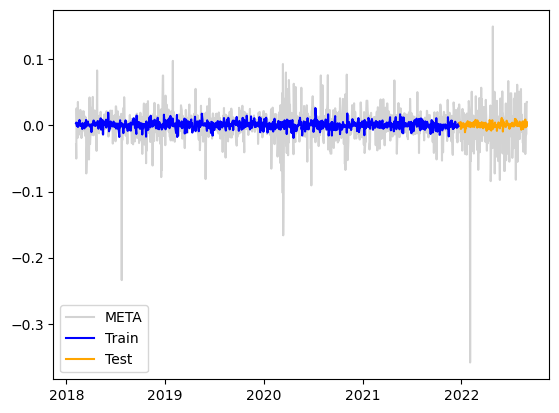

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=219; total time=   0.6s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=219; total time=   0.6s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=219; total time=   0.5s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=533; total time=   1.3s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=533; total time=   1.4s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=533; total time=   1.6s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10

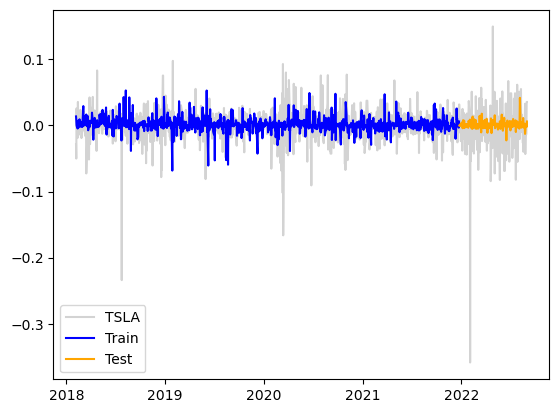

--- Saving predictions into csv ---
--- Predictions saved ---


In [27]:
vader_rr_results_tuned, vader_models_tuned = rf_r_returns(vader_all_w,'Tuned/vader_pred_returns', tuning=True)

##### Flair

train R-squared score : 0.8465189110367535
test R-squared score : -0.10693949907146538


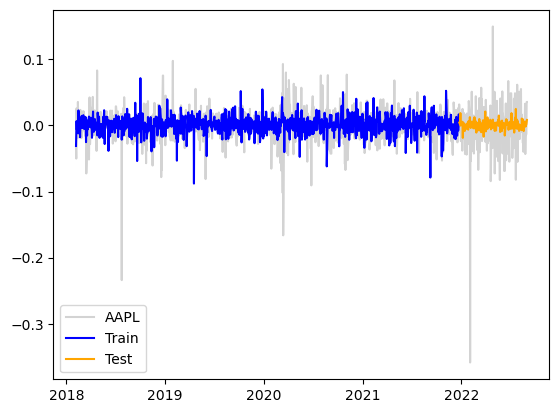

train R-squared score : 0.8404191299638372
test R-squared score : -0.13767987573687357


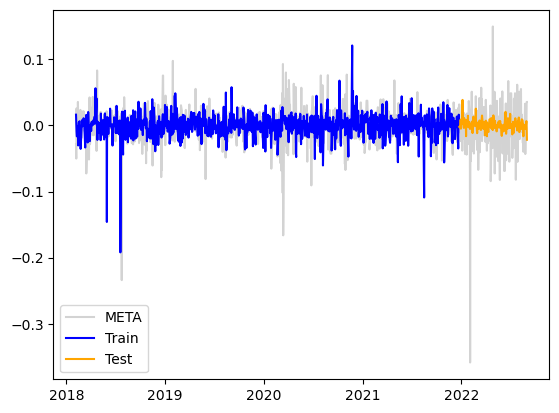

train R-squared score : 0.8439610544284858
test R-squared score : -0.07527477204060351


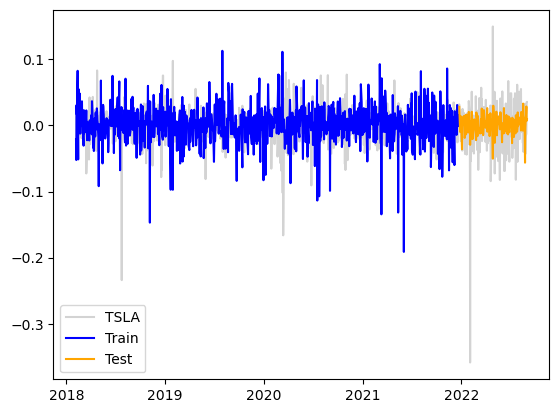

--- Saving predictions into csv ---
--- Predictions saved ---


In [28]:
flair_rr_results, flair_models = rf_r_returns(flair_all_w,'flair_pred_returns')

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=219; total time=   0.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=219; total time=   0.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=219; total time=   0.6s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=533; total time=   1.4s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=533; total time=   1.4s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=533; total time=   1.5s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=4

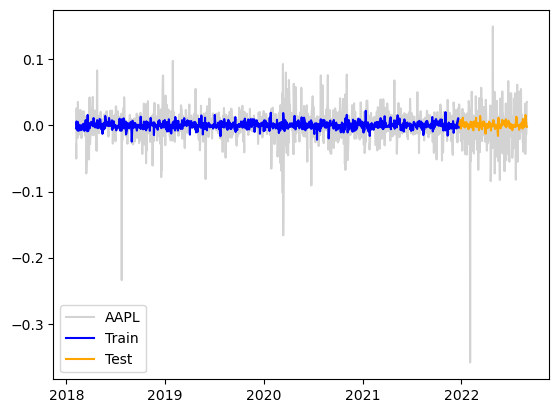

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=219; total time=   0.5s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=219; total time=   0.6s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=219; total time=   0.5s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=533; total time=   1.2s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=533; total time=   1.2s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=533; total time=   1.2s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=4

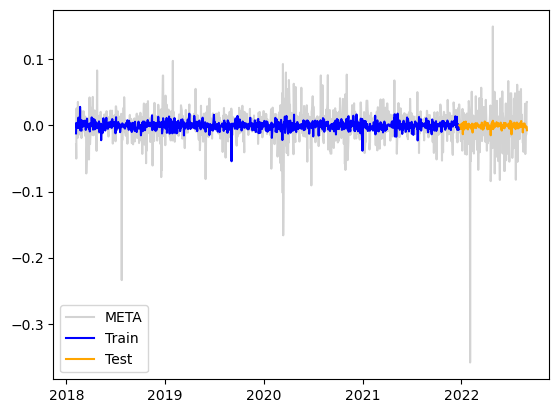

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=219; total time=   0.6s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=219; total time=   0.6s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=219; total time=   0.6s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=533; total time=   1.4s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=533; total time=   1.4s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=533; total time=   1.4s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=4

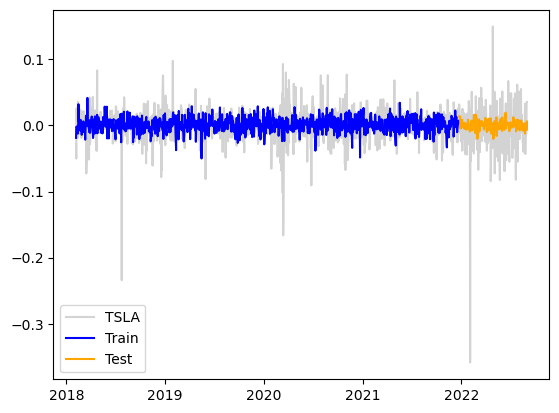

--- Saving predictions into csv ---
--- Predictions saved ---


In [29]:
flair_rr_results_tuned, flair_models_tuned = rf_r_returns(flair_all_w,'Tuned/flair_pred_returns',tuning=True)

##### Finbert

train R-squared score : 0.8421161874527099
test R-squared score : -0.1341025980081445


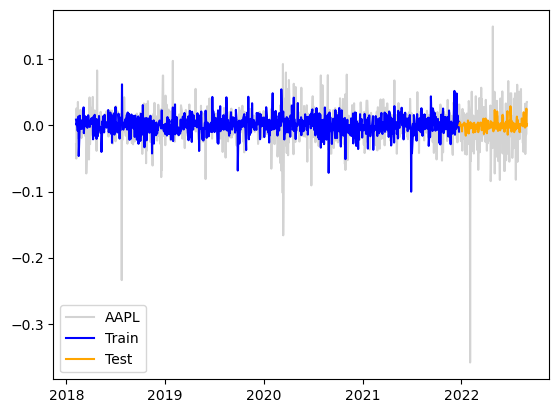

train R-squared score : 0.8456399324155709
test R-squared score : -0.05034392216744199


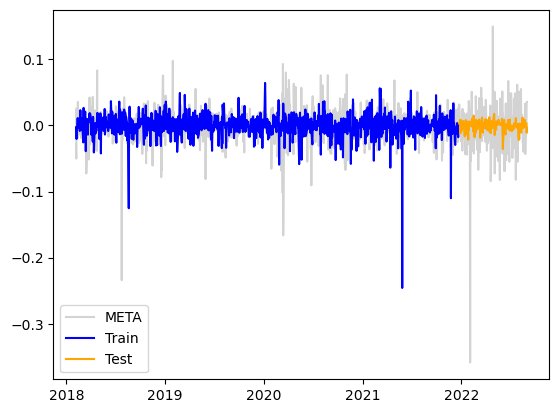

train R-squared score : 0.8481638067166363
test R-squared score : -0.12277788267462952


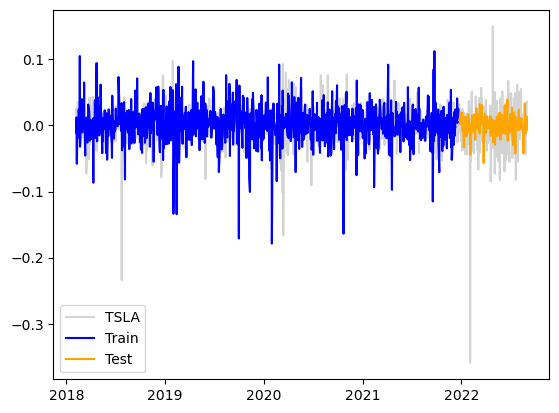

--- Saving predictions into csv ---
--- Predictions saved ---


In [30]:
finbert_rr_results, finbert_models = rf_r_returns(finbert_all_w,'finbert_pred_returns')

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=219; total time=   0.6s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=219; total time=   0.6s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=219; total time=   0.7s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=533; total time=   1.6s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=533; total time=   1.7s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=533; total time=   1.7s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10

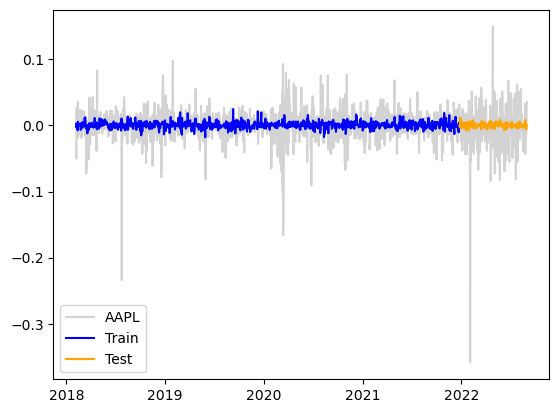

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=219; total time=   0.8s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=219; total time=   0.8s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=219; total time=   0.7s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=533; total time=   1.9s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=533; total time=   2.0s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=533; total time=   2.1s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10

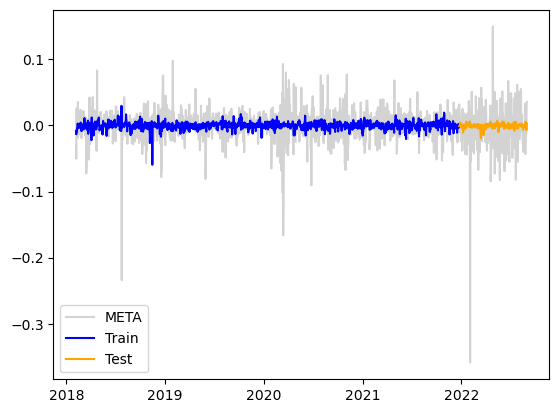

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=219; total time=   0.6s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=219; total time=   0.6s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=219; total time=   0.7s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=533; total time=   1.7s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=533; total time=   1.9s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=533; total time=   1.9s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10

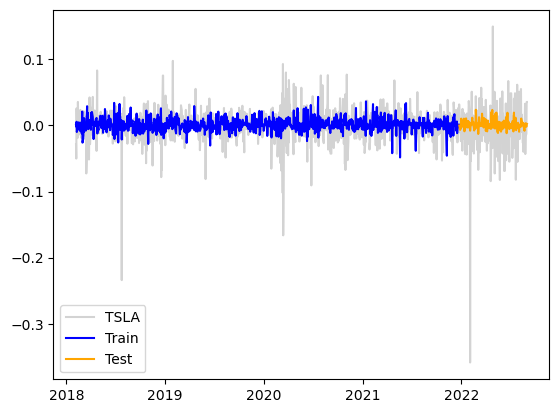

--- Saving predictions into csv ---
--- Predictions saved ---


In [31]:
finbert_rr_results_tuned, finbert_models_tuned = rf_r_returns(finbert_all_w,'Tuned/finbert_pred_returns', tuning=True)

##### Stacked

train R-squared score : 0.8501055869382408
test R-squared score : -0.08121229915920036


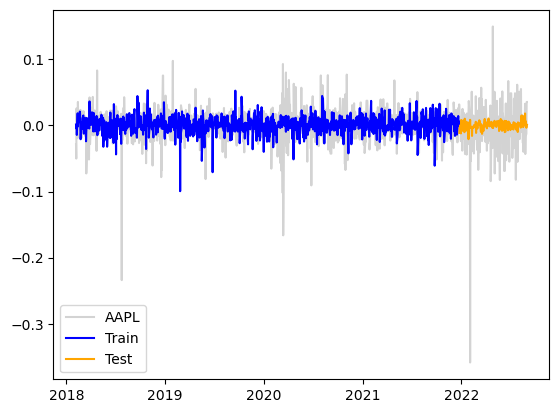

train R-squared score : 0.8456507988040782
test R-squared score : -0.11441960225170655


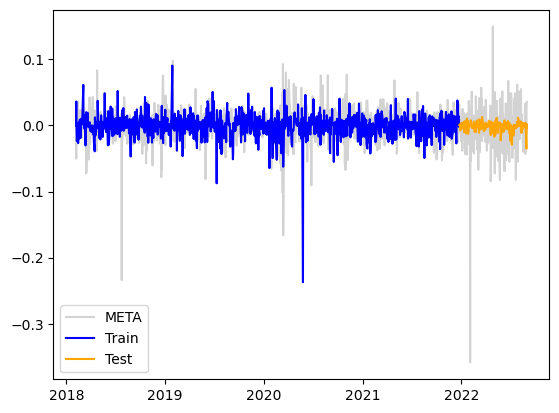

train R-squared score : 0.8547040567770426
test R-squared score : -0.0680726181498581


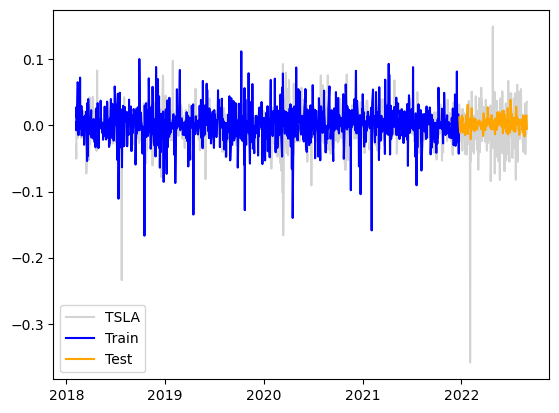

--- Saving predictions into csv ---
--- Predictions saved ---


In [32]:
stacked_rr_results, stacked_models = rf_r_returns(df_stacked,'stacked_pred_returns')

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=219; total time=   0.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=219; total time=   0.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=219; total time=   0.6s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=533; total time=   1.9s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=533; total time=   2.0s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=533; total time=   2.1s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10

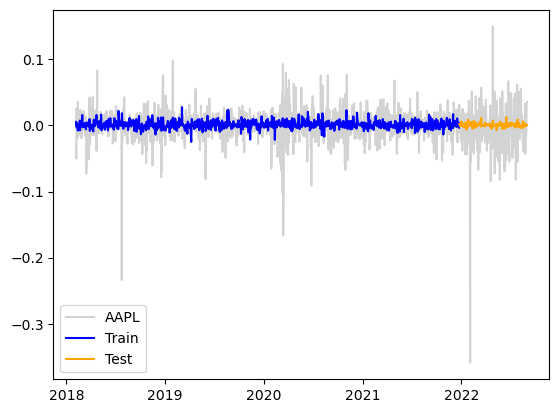

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=219; total time=   0.8s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=219; total time=   0.8s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=219; total time=   0.7s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=533; total time=   2.2s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=533; total time=   2.3s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=533; total time=   2.4s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10

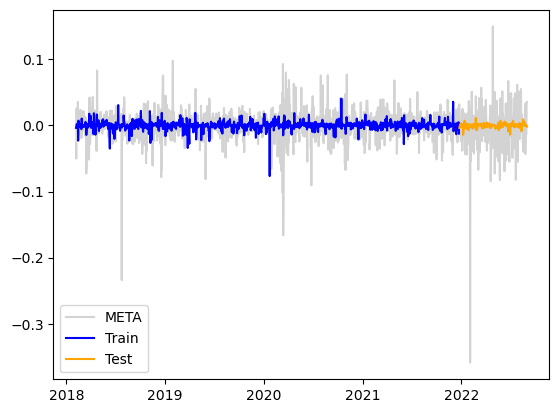

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=219; total time=   0.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=219; total time=   0.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=219; total time=   0.6s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=533; total time=   2.0s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=533; total time=   2.0s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=533; total time=   2.1s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10

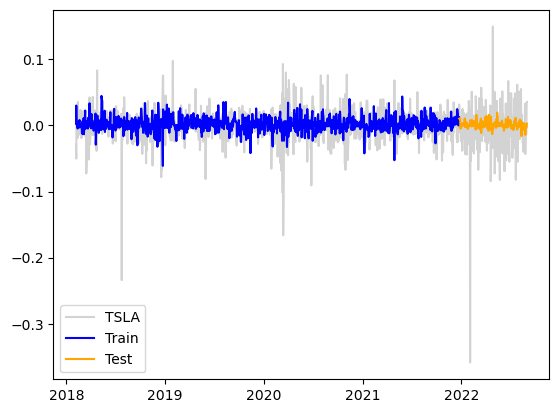

--- Saving predictions into csv ---
--- Predictions saved ---


In [33]:
stacked_rr_results_tuned, stacked_models_tuned = rf_r_returns(df_stacked,'Tuned/stacked_pred_returns', tuning = True)

##### Results

In [34]:
stacked_rr_results_tuned['Data'] = 'stacked'
stacked_rr_results['Data'] = 'stacked'
vader_rr_results_tuned['Data'] = 'vader'
vader_rr_results['Data'] = 'vader'
flair_rr_results_tuned['Data'] = 'flair'
flair_rr_results['Data'] = 'flair'
finbert_rr_results_tuned['Data'] = 'finbert'
finbert_rr_results['Data'] = 'finbert'

returns_results = pd.concat([stacked_rr_results_tuned, stacked_rr_results, vader_rr_results_tuned,
                            vader_rr_results, flair_rr_results_tuned,
                            flair_rr_results, finbert_rr_results_tuned,
                            finbert_rr_results], axis=0)
returns_results.sort_values(by=['Company', 'Test score'], ascending = False)

Company  Train score  Test score                        Model     Data
2    TSLA     0.343294    0.014695  Tuned regressor for returns    flair
2    TSLA     0.359868    0.006310  Tuned regressor for returns    vader
2    TSLA     0.383585   -0.016421  Tuned regressor for returns  stacked
2    TSLA     0.319109   -0.026089  Tuned regressor for returns  finbert
2    TSLA     0.854704   -0.068073        Regressor for returns  stacked
2    TSLA     0.843961   -0.075275        Regressor for returns    flair
2    TSLA     0.844174   -0.094711        Regressor for returns    vader
2    TSLA     0.848164   -0.122778        Regressor for returns  finbert
1    META     0.390999   -0.011683  Tuned regressor for returns  stacked
1    META     0.306761   -0.020692  Tuned regressor for returns  finbert
1    META     0.318179   -0.042313  Tuned regressor for returns    flair
1    META     0.331040   -0.042700  Tuned regressor for returns    vader
1    META     0.845640   -0.050344        Regressor for returns  finbert
1    META     0.845651   -0.114420        Regressor for returns  stacked
1    META     0.840419   -0.137680        Regressor for returns    flair
1    META     0.856663   -0.158079        Regressor for returns    vader
0    AAPL     0.409422   -0.041955  Tuned regressor for returns  stacked
0    AAPL     0.320034   -0.047744  Tuned regressor for returns  finbert
0    AAPL     0.348112   -0.060784  Tuned regressor for returns    flair
0    AAPL     0.309407   -0.066525  Tuned regressor for returns    vader
0    AAPL     0.850106   -0.081212        Regressor for returns  stacked
0    AAPL     0.846519   -0.106939        Regressor for returns    flair
0    AAPL     0.841515   -0.129395        Regressor for returns    vader
0    AAPL     0.842116   -0.134103        Regressor for returns  finbert

Lets look at the top performing regressors for each company

In [104]:
print('Top performing regressor for TSLA uses flair sentiment analysis with parameters below:')
flair_models_tuned[2].get_params()

Top performing regressor for TSLA uses flair sentiment analysis with parameters below:


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1895,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [105]:
print('Top performing regressor for META uses finbert sentiment analysis with parameters below:')
finbert_models_tuned[1].get_params()

Top performing regressor for META uses finbert sentiment analysis with parameters below:


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1895,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [106]:
print('Top performing regressor for AAPL uses flair sentiment analysis with parameters below:')
flair_models_tuned[0].get_params()

Top performing regressor for AAPL uses flair sentiment analysis with parameters below:


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1895,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

#### Predicting closing price

train R-squared score : 0.9244744912671616
test R-squared score : 0.5243120344313243


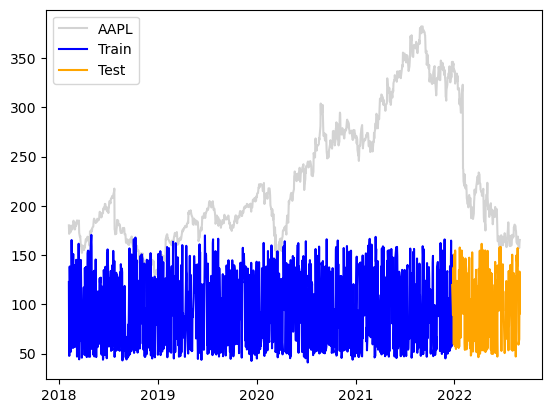

train R-squared score : 0.9180700569503301
test R-squared score : 0.4476548273129729


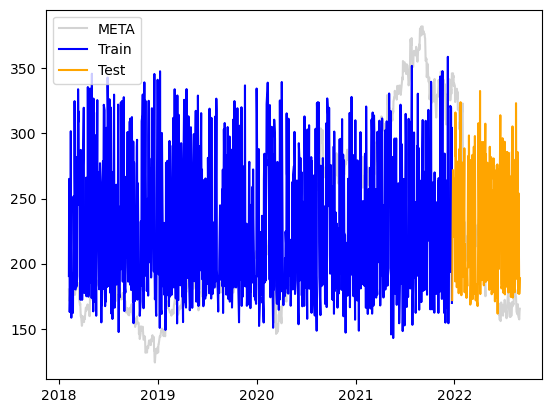

train R-squared score : 0.923166689750346
test R-squared score : 0.45378078203709515


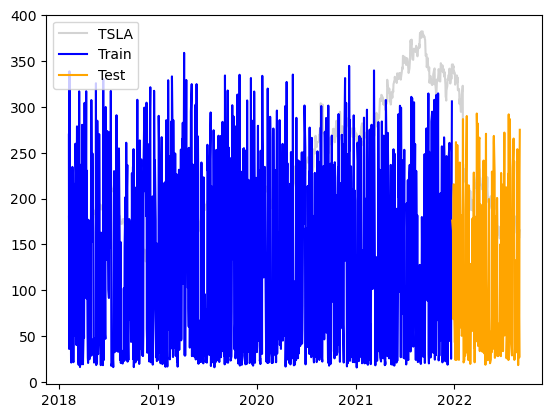

--- Saving predictions into csv ---
--- Predictions saved ---


In [35]:
vader_rc_results = rf_r_close(vader_all_w,'vader_pred_close')

train R-squared score : 0.931420244558976
test R-squared score : 0.48378997234517407


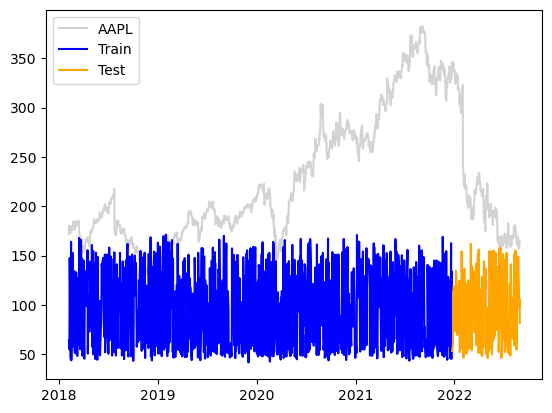

train R-squared score : 0.9143048020148756
test R-squared score : 0.3468698586920491


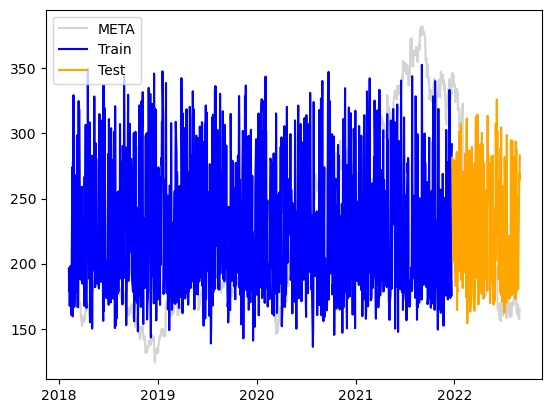

train R-squared score : 0.9187554489770795
test R-squared score : 0.4825670958361886


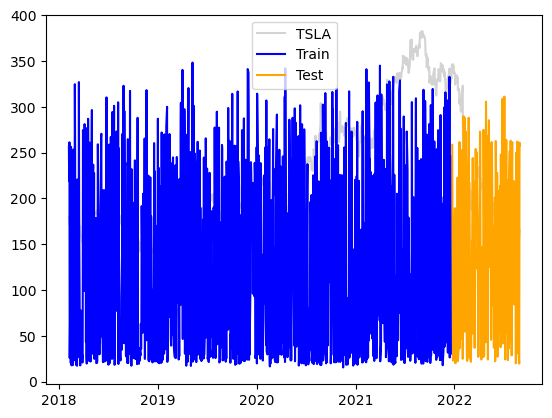

--- Saving predictions into csv ---
--- Predictions saved ---


In [36]:
flair_rc_results = rf_r_close(flair_all_w,'flair_pred_close')

train R-squared score : 0.9419558684962386
test R-squared score : 0.5884977458086713


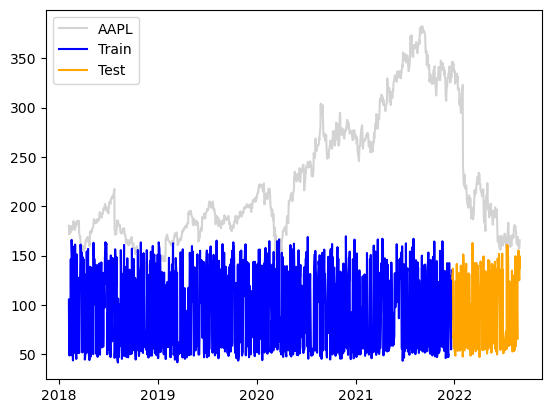

train R-squared score : 0.9138664317366858
test R-squared score : 0.5135425935009359


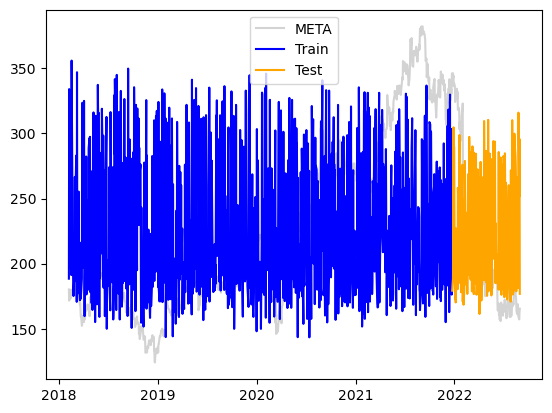

train R-squared score : 0.9325875356256497
test R-squared score : 0.6039243363728126


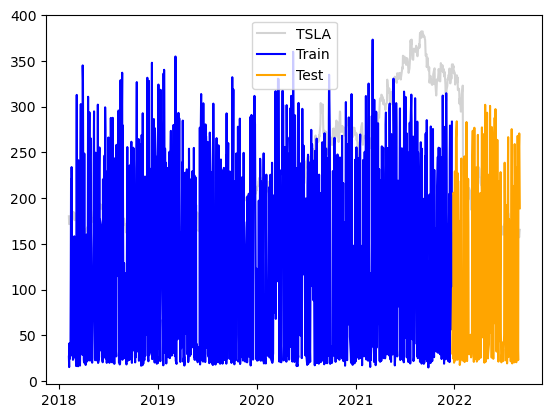

--- Saving predictions into csv ---
--- Predictions saved ---


In [37]:
finbert_rc_results = rf_r_close(finbert_all_w,'finbert_pred_close')

train R-squared score : 0.9527250769739676
test R-squared score : 0.5834479964515868


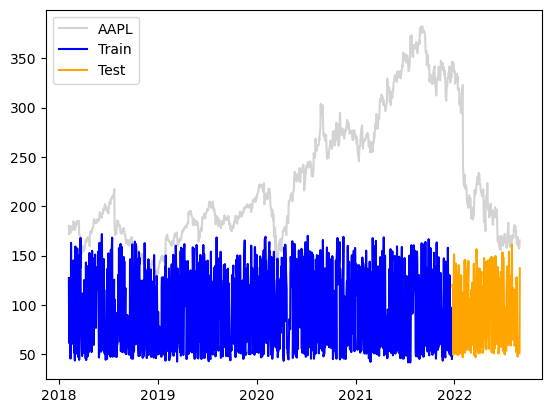

train R-squared score : 0.9299659411251946
test R-squared score : 0.5138261839523933


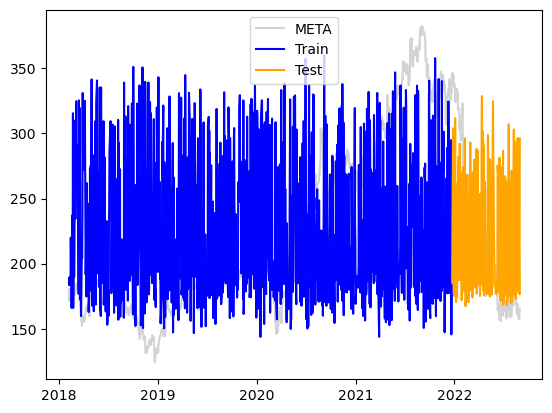

train R-squared score : 0.9443691889485639
test R-squared score : 0.6025165178426148


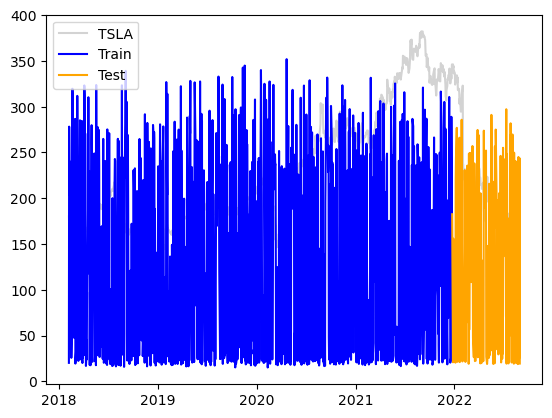

--- Saving predictions into csv ---
--- Predictions saved ---


In [38]:
stacked_rc_results = rf_r_close(df_stacked,'stacked_pred_close')

##### Results

In [39]:
stacked_rc_results['Data'] = 'stacked'
vader_rc_results['Data'] = 'vader'
flair_rc_results['Data'] = 'flair'
finbert_rc_results['Data'] = 'finbert'

overall_results = pd.concat([stacked_rc_results, 
                            vader_rc_results,
                            flair_rc_results,
                            finbert_rc_results], axis=0)
overall_results.sort_values(by=['Company', 'Test score'], ascending = False)

Company  Train score  Test score                Model     Data
2    TSLA     0.932588    0.603924  Regressor for price  finbert
2    TSLA     0.944369    0.602517  Regressor for price  stacked
2    TSLA     0.918755    0.482567  Regressor for price    flair
2    TSLA     0.923167    0.453781  Regressor for price    vader
1    META     0.929966    0.513826  Regressor for price  stacked
1    META     0.913866    0.513543  Regressor for price  finbert
1    META     0.918070    0.447655  Regressor for price    vader
1    META     0.914305    0.346870  Regressor for price    flair
0    AAPL     0.941956    0.588498  Regressor for price  finbert
0    AAPL     0.952725    0.583448  Regressor for price  stacked
0    AAPL     0.924474    0.524312  Regressor for price    vader
0    AAPL     0.931420    0.483790  Regressor for price    flair

#### Predicting price movement

/Users/ashleyho/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/ashleyho/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


train R-squared score : 0.6456071076011846
test R-squared score : 0.5586592178770949


/Users/ashleyho/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/ashleyho/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


train R-squared score : 0.6327739387956565
test R-squared score : 0.4860335195530726


/Users/ashleyho/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/ashleyho/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


train R-squared score : 0.6515301085883515
test R-squared score : 0.547486033519553
--- Saving predictions into csv ---
--- Predictions saved ---


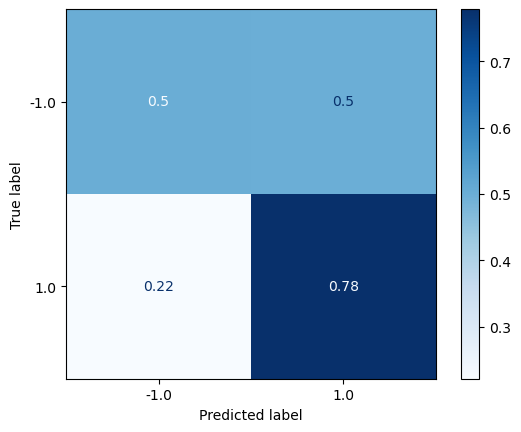

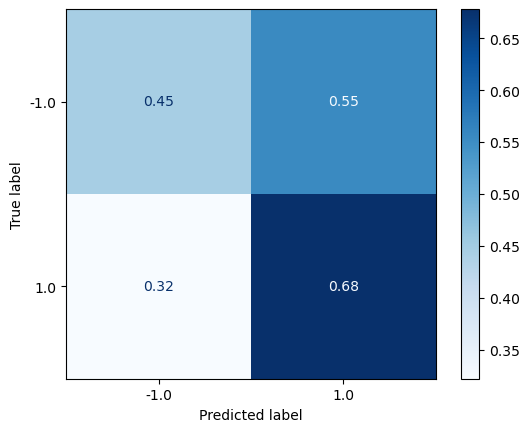

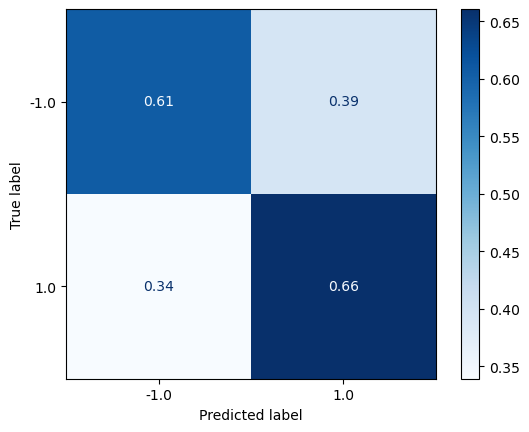

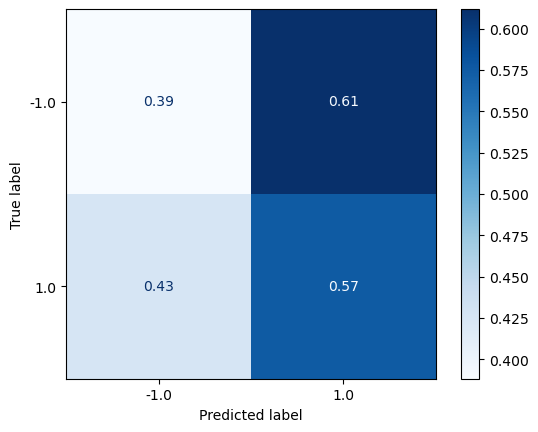

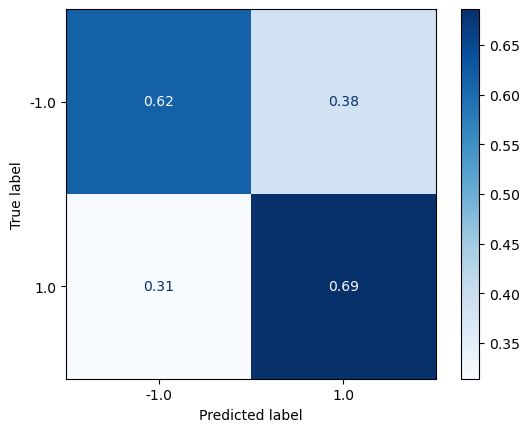

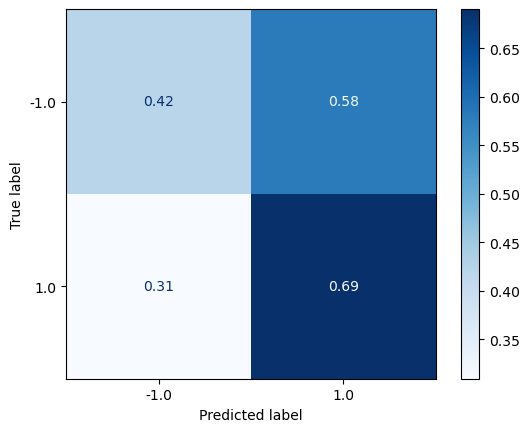

In [40]:
vader_cc_results = rf_c_close(vader_class_w,'vader_pred_close')

/Users/ashleyho/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/ashleyho/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


train R-squared score : 0.6258637709772952
test R-squared score : 0.4860335195530726


/Users/ashleyho/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/ashleyho/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


train R-squared score : 0.6120434353405726
test R-squared score : 0.44692737430167595


/Users/ashleyho/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/ashleyho/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


train R-squared score : 0.6110562685093781
test R-squared score : 0.46368715083798884
--- Saving predictions into csv ---
--- Predictions saved ---


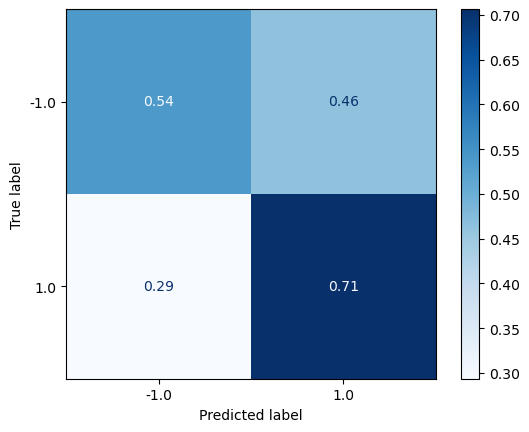

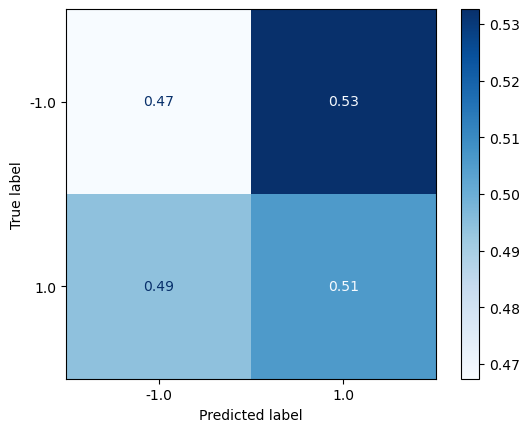

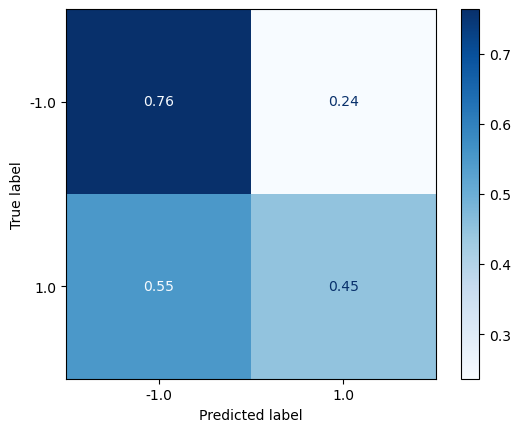

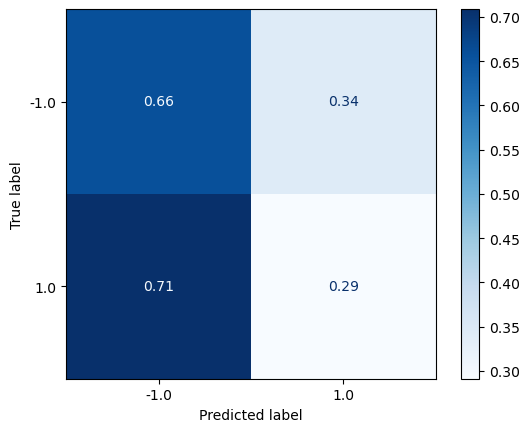

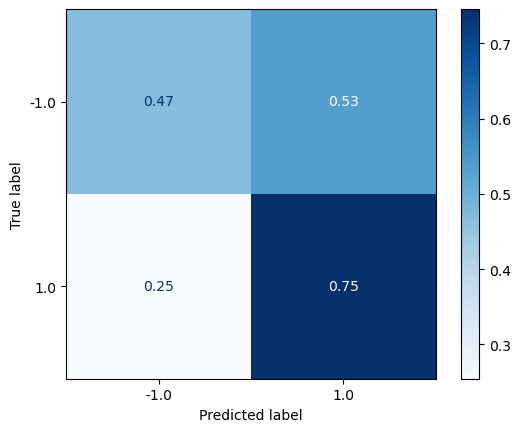

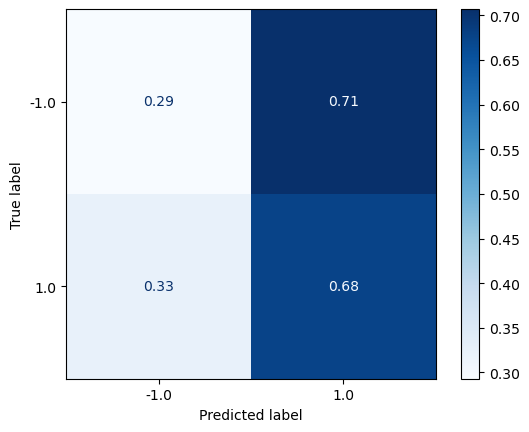

In [41]:
flair_cc_results = rf_c_close(flair_class_w,'flair_pred_close')

/Users/ashleyho/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/ashleyho/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


train R-squared score : 0.6159921026653504
test R-squared score : 0.5642458100558659


/Users/ashleyho/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/ashleyho/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


train R-squared score : 0.6150049358341559
test R-squared score : 0.5754189944134078


/Users/ashleyho/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/ashleyho/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


train R-squared score : 0.6071076011846002
test R-squared score : 0.553072625698324
--- Saving predictions into csv ---
--- Predictions saved ---


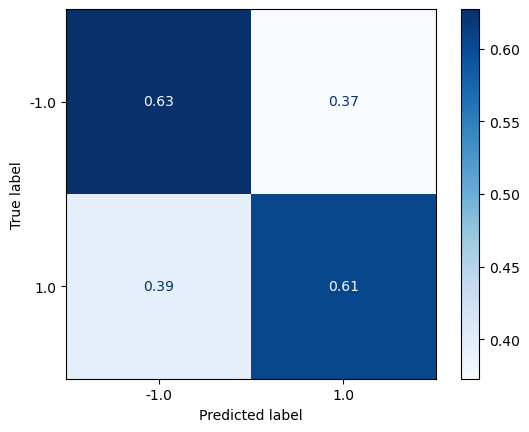

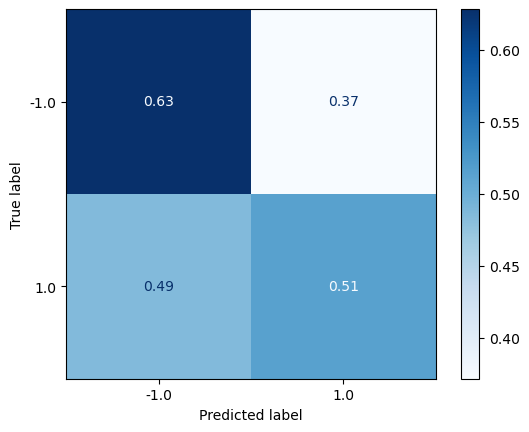

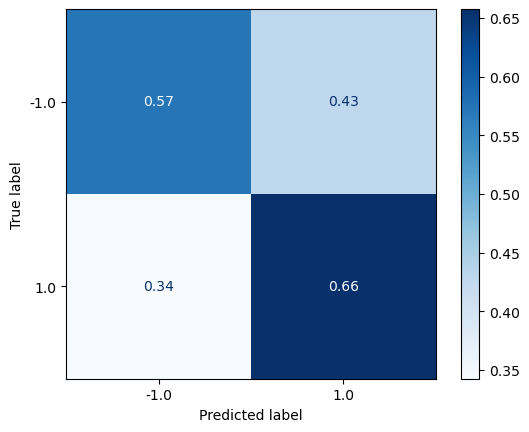

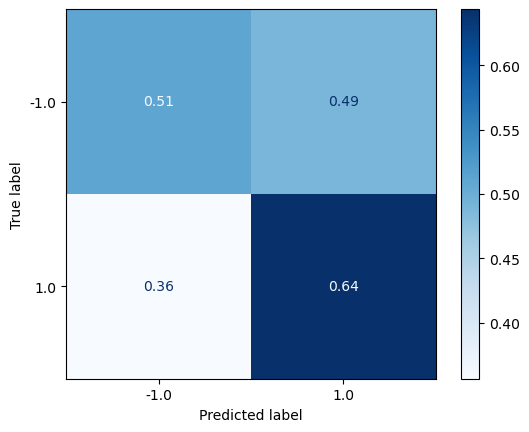

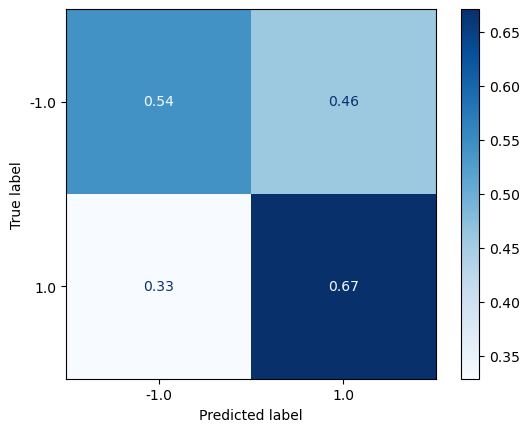

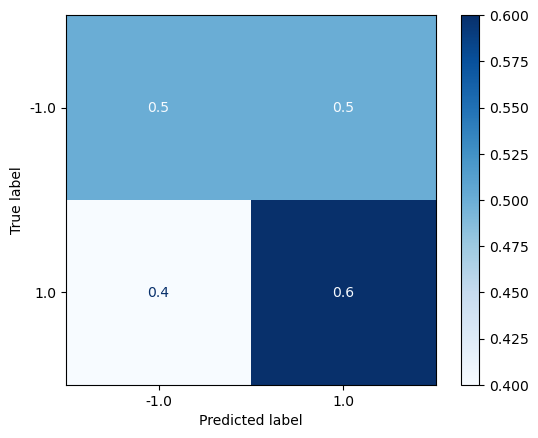

In [42]:
finbert_cc_results = rf_c_close(finbert_class_w,'finbert_pred_close')

/Users/ashleyho/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/ashleyho/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


train R-squared score : 1.0
test R-squared score : 0.4692737430167598


/Users/ashleyho/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/ashleyho/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


train R-squared score : 1.0
test R-squared score : 0.5139664804469274


/Users/ashleyho/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/ashleyho/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


train R-squared score : 1.0
test R-squared score : 0.5307262569832403
--- Saving predictions into csv ---
--- Predictions saved ---


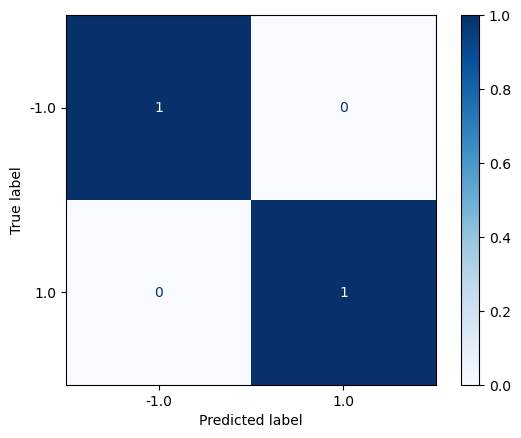

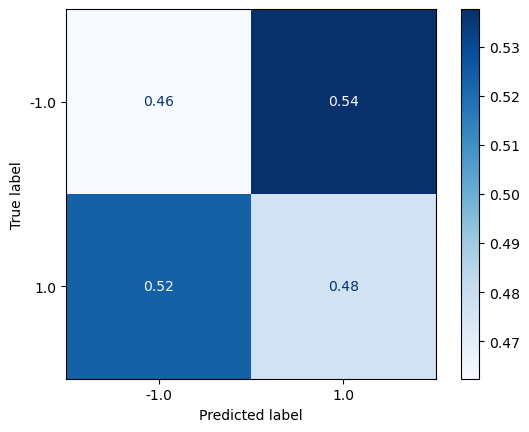

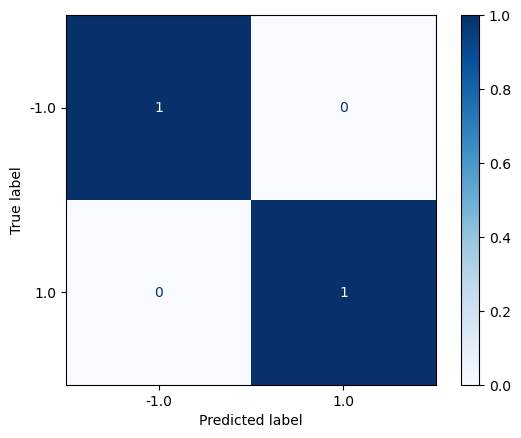

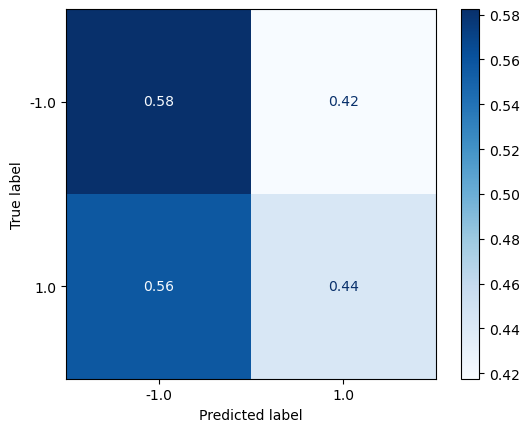

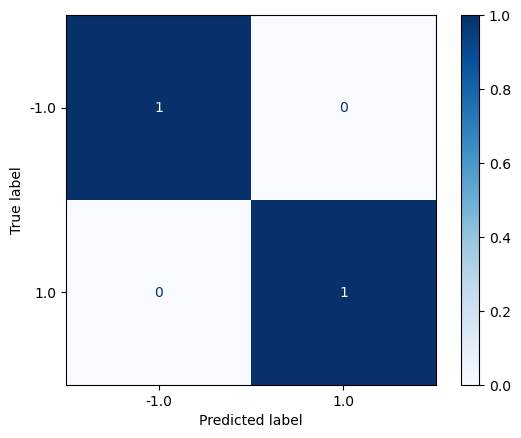

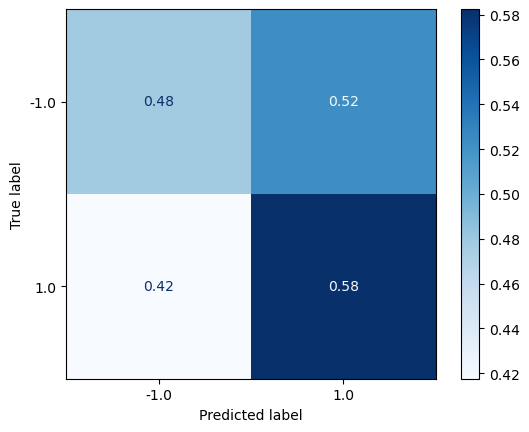

In [43]:
stacked_cc_results = rf_c_close(df_stacked,'stacked_pred_close')

##### Results

In [44]:
stacked_cc_results['Data'] = 'stacked'
vader_cc_results['Data'] = 'vader'
flair_cc_results['Data'] = 'flair'
finbert_cc_results['Data'] = 'finbert'

overall_results = pd.concat([stacked_cc_results, 
                            vader_cc_results,
                            flair_cc_results,
                            finbert_cc_results], axis=0)
overall_results.sort_values(by=['Company', 'Test score'], ascending = False)

Company  Train score  Test score                 Model     Data
2    TSLA     0.607108    0.553073  Classifier for price  finbert
2    TSLA     0.651530    0.547486  Classifier for price    vader
2    TSLA     1.000000    0.530726  Classifier for price  stacked
2    TSLA     0.611056    0.463687  Classifier for price    flair
1    META     0.615005    0.575419  Classifier for price  finbert
1    META     1.000000    0.513966  Classifier for price  stacked
1    META     0.632774    0.486034  Classifier for price    vader
1    META     0.612043    0.446927  Classifier for price    flair
0    AAPL     0.615992    0.564246  Classifier for price  finbert
0    AAPL     0.645607    0.558659  Classifier for price    vader
0    AAPL     0.625864    0.486034  Classifier for price    flair
0    AAPL     1.000000    0.469274  Classifier for price  stacked